# Nonlinear Regression Practice Problem

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

In [1]:
# load libraries
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize
import math
import matplotlib.pyplot as plt

## Learning Objectives

After studying this notebook, attending class, asking questions, and reviewing your notes, you should be able to:
* Develop transformations for some nonlinear models and apply linear regression
* Perform residual analysis for linear and nonlinear regression (as diagnostic plots for both)
* Calculate standard errors (i.e., standard deviation) of the residuals
* Assemble the covariance matrix for linear regression using normal equations (i.e., feature matrix $\mathbf{X}$)
* Calculate nonlinear regression best fit using Python
* Assemble the covariance matrix for nonlinear regression

## Nonlinear Regression Practice Problem

For this question, you will use nonlinear regression to analyze the kinetics of an indicator in a strong base.

### Background

Phenolphthalein is a base indicator (it turns a pretty purple), but in the presence of a strong base, it will fade over time.  This is a reversible reaction: pseudo first order in the forward (fading) direction (it is actually second order, but there is so much $[OH^-]$ that it can be simplified as pseudo first order) and first order in the reverse direction. The rate expression is:

\begin{equation} 
\frac{d[P]}{dt} = -k_{1}[P][OH^-]+k_{2}[POH] ~,
\end{equation}

where $k_{1}' = k_{1}  \cdot [OH^-]$ is the pseudo first order rate. $[POH]$ is only produced from this reaction, thus we have the mass balance:

\begin{equation}
[POH] = [POH]\Big|_{t=0}+([P]_{0}-[P]) ~.
\end{equation}

With the initial conditions:

\begin{equation}
[P]\Big|_{t=0}=[P]_{0}\qquad; \qquad [POH]\Big|_{t=0}=0 ~.
\end{equation}

We can solve these equations to get the solution:

\begin{equation}
[P] = [P]_{0}\Big(\frac{k_{2}}{k_{1}'+k_{2}}+\frac{k_{1}'}{k_{1}'+k_{2}}e^{-(k_{1}'+k_{2})t}\Big) ~.
\end{equation}

We seek best fit values for parameters 
\begin{equation}
k=\begin{bmatrix}k_{1}' & k_{2} & k_{eq}\end{bmatrix}^T ~.
\end{equation}

However, this problem is poorly scaled with respect to $k$. Instead, we will transform it to obtain:

\begin{equation} 
[P] = [P]_{eq}+([P]_{0}-[P]_{eq})e^{-\lambda t}
\end{equation}

where $\lambda=k_{1}'+k_{2}$. These two rate constants can be calculated from the ratio of the initial and equilibrium concentrations and the exponential decay rate.

Consider an experiment where students introduce a dilute amount of phenolphthalein into a 0.1M NaOH solution.  Using a colorimeter, students measure the following absorbances as a function of time:

| Time (min) | Absorbance |
|-|-|
| 0 | 1.1546 |
| 10 | 0.9456 |
| 20 | 0.8257 |
| 30 | 0.7442 |
| 40 | 0.6310 |
| 50 | 0.5536 |
| 60 | 0.4738 |
| 70 | 0.4507 |
| 80 | 0.3671 |
| 90 | 0.3826 |
| 100 | 0.3574 |
| 110 | 0.2926 |
| 120 | 0.3105 |
		
Because the solution is so dilute, the absorbance obeys Beer's Law; thus the absorbance is proportional to the concentration.  

### Transform Model Parameters

On paper, derive expressions for:

1. $k_{1}'$, 
2. $k_{2}$,
3. and $k_{eq}$ 

in terms of $P_0, P_{eq}, \lambda$. 

Show your work. *Hint*: $k_{eq} = k'_1 / k_2$. 

### Perform Nonlinear Regression

Compute the best fit values for parameters $x = [~ [P]_0, [P]_{eq}, \lambda ~]^T$ using the experimental data. Call your solution vector `x_sol` and store your answers in variables `P0`, `Peq`, and `l`.

In [2]:
# time and concentration data
data = np.array([[0, 1.1546],
                [10, 0.9456],
                [20, 0.8257],
                [30, 0.7442],
                [40, 0.631],
                [50, 0.5536],
                [60, 0.4738],
                [70, 0.4507],
                [80, 0.3671],
                [90, 0.3826],
                [100, 0.3754],
                [110, 0.2926],
                [120, 0.3105]])

t = data[:,0] # the times, min
p = data[:,1] # the concentrations, M
n = len(t) # number of data points

In [3]:
# define functions to evaluation model and residuals.


def model_func(x, t):
    '''
    Function to define model being fitted
    Arguments:
        x: parameter vector
        t: time vector
    Returns:
        model: matrix of equations
    '''
    ### BEGIN SOLUTION
    
    model = x[1]+(x[0]-x[1])*np.exp(-x[2]*t)
    
    ### END SOLUTION
    
    return model
    
def regression_func(x, t, p):
    '''
    Function to define regression function for least-squares fitting
    Arguments:
        x: parameter vector
        t: time vector
        p: concentrations vector
    Returns:
        r: residuals
    '''
    ### BEGIN SOLUTION
    r = p - model_func(x,t);
    ### END SOLUTION
    
    return r


In [4]:
#Find parameters (remember to save in x_sol)
### BEGIN SOLUTION
x_guess = np.array([1, 1, 1])

x_vals = optimize.least_squares(regression_func, x_guess,method='lm',
                                args=(t, p))

x_sol = x_vals.x

P0 = x_sol[0]
Peq = x_sol[1]
l = x_sol[2]

print(P0, Peq, l)
### END SOLUTION

1.1428633167387818 0.22859338079791036 0.02084503096472361


### Plot Residuals and Fitted Model

A critical assumption in regression analysis is that the model errors are independent and identically distributed. Do the following to check this assumption:
1. Calculate the residuals. Save the answer in the variable `res`.
2. Plot the residuals vs. time
3. Plot concentration prediction (from your model) vs. time. On the same graph, plot the experimental data.
4. Write at least two sentences to interpret the plots.


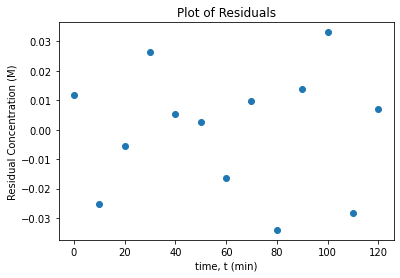

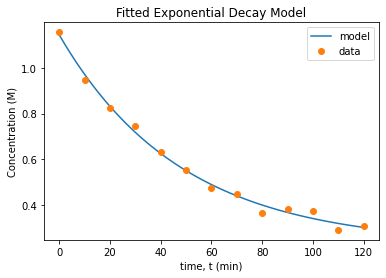

In [5]:
### BEGIN SOLUTION
# Plot residuals
model = model_func(x_sol,t);
res = p - model;

plt.plot(t,res,'o')
plt.xlabel('time, t (min)')
plt.ylabel('Residual Concentration (M)')
plt.title('Plot of Residuals')
plt.show()

# Plot fitted model and original data
tplot = np.linspace(0,120,100);
pplot = model_func(x_sol,tplot);

plt.plot(tplot,pplot)
plt.plot(t,p,'o')
plt.xlabel('time, t (min)')
plt.ylabel('Concentration (M)')
plt.title('Fitted Exponential Decay Model')
plt.legend(['model','data'], loc='best')
plt.show()

### END SOLUTION

### Covariance Matrix

We can quickly estimate the covariance matrix:

\begin{equation}
	\Sigma_x \approx {\hat{\sigma}}^2_r \left( J^T J \right)^{-1}
\end{equation}

where $\hat{\sigma}^2_r$ is the variance of the residuals and $J$ is the Jacobian of the residuals with respect to the model parameters $x$.

Do the following on paper:
1. Assemble the gradient vectors $\nabla_{x} k_{1}'$, $\nabla_{x} k_{2}$, and $\nabla_{x} k_{eq}$.
2. Write the formula to calculate the covariance matrix $\Sigma_{k}$. Hint: look at your notes for multivariate error propagation.
3. Write the equations to calculate $\sigma_{K_{eq}}$ and its 95% confidence interval. Leave your answers in symbolic form.

Finally, implement the calculations (above steps) in Python. You will need to start by calculating $\Sigma_x$. Report the standard deviation of the equilibrium constand and the 95% confidence interval with the units and a reasonable number of significant digits.  

In [6]:
### BEGIN SOLUTION
## Assemble covariance matrix another way

# Calculate the variance in the random error from the residuals
sigre = res.T@res / (n-3)
print('Variance of residuals = {0:0.4f} M^2\n'.format(sigre))
variance = sigre

cov_x = sigre*np.linalg.inv(x_vals.jac.T @ x_vals.jac)
print("Covariance matrix of x =\n",cov_x)

# Calcuate Keq
Keq = x_sol[0]/x_sol[1] - 1

# Calculate Jacobian matrix
gradk1 = [x_sol[1]*x_sol[2]/x_sol[0]**2,-x_sol[2]/x_sol[0],1-x_sol[1]/x_sol[0]]

gradk2 = [-x_sol[1]*x_sol[2]/x_sol[0]**2,x_sol[2]/x_sol[0],x_sol[1]/x_sol[0]]

gradKeq = [1/x_sol[1],-x_sol[0]/x_sol[1]**2,0]

gradf = np.array([gradk1,gradk2,gradKeq])

print("\nJacobian of k =\n",gradf)

# Calculate covariance matrix of k
varkmc = gradf@cov_x@gradf.T
print("\nCovariance matrix of k =\n",varkmc)

# Calculate the 95% confidence interval for Keq
sigKeqmc = varkmc[2,2]**0.5
stdev_7 = sigKeqmc
print("\nStandard deviation of keq = {0:0.4f}".format(sigKeqmc))
tstar = stats.t.ppf([.025, .975], n-3)
print("t = ",tstar)
Keqintervalmc = Keq + sigKeqmc*tstar

print("\n95% confidence interval for Keq: [{0:0.4f}, {1:0.4f}]".\
      format(Keqintervalmc[0],Keqintervalmc[1]))
lb_7 = Keqintervalmc[0]
ub_7 = Keqintervalmc[1]

### END SOLUTION

Variance of residuals = 0.0005 M^2

Covariance matrix of x =
 [[3.68684558e-04 2.24826270e-04 2.02814257e-05]
 [2.24826270e-04 7.98877403e-04 4.56687953e-05]
 [2.02814257e-05 4.56687953e-05 3.04396714e-06]]

Jacobian of k =
 [[ 3.64819135e-03 -1.82393036e-02  7.99981872e-01]
 [-3.64819135e-03  1.82393036e-02  2.00018128e-01]
 [ 4.37457986e+00 -2.18709170e+01  0.00000000e+00]]

Covariance matrix of k =
 [[ 9.74466942e-07  7.01675090e-07 -4.39373161e-04]
 [ 7.01675090e-07  6.66150016e-07 -4.70722552e-04]
 [-4.39373161e-04 -4.70722552e-04  3.46167136e-01]]

Standard deviation of keq = 0.5884
t =  [-2.22813885  2.22813885]

95% confidence interval for Keq: [2.6886, 5.3105]


### Final Thoughts

* Residuals look much better with nonlinear regression
* Covariance matrix is much more reasonable
* Nonlinear regression is not that expensive or difficult, especially with Python and modern optimization algorithms